In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
cd"dataset3"

/mnt/batch/tasks/shared/LS_root/mounts/clusters/machine-le-ins5/code/dataset3


In [3]:
from keras.models import load_model
hybrid=load_model("hybrid.h5")

In [4]:
from keras.applications.imagenet_utils import preprocess_input

In [5]:
from keras.preprocessing import image
import requests
from skimage.segmentation import slic
import matplotlib.pylab as pl
import numpy as np
import shap
import warnings
warnings.filterwarnings("ignore")

# load model data

feature_names = ['covid','normal']
model = load_model('Resnet18.h5')

In [140]:
file = "train/covid/COVID19_190_.jpeg"

In [141]:
from lime.lime_image import *
from lime import lime_image

In [142]:
img = image.load_img(file, target_size=(224, 224))
img_orig = image.img_to_array(img)

# segment the image so we don't have to explain every pixel
segments_slic = slic(img, n_segments=60, compactness=0.1, sigma=3)

In [143]:
a=preprocess_input(np.expand_dims(img_orig.copy(), axis=0))

In [144]:
x1 = np.squeeze(a, axis=0)

In [145]:
def segment_fn(img):
    return slic(img, n_segments=50, compactness=10, sigma=1)

In [146]:
preds = model.predict(preprocess_input(np.expand_dims(img_orig.copy(), axis=0)))
top_preds = np.argsort(-preds)

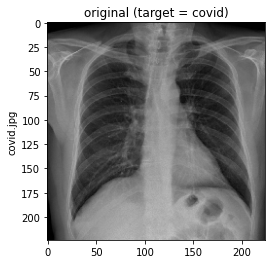

In [147]:
title = 'original (target = '+str('covid')+')'
plt.title(title)
plt.ylabel("covid"+'.jpg')
plt.imshow(img)
title = 'segmentation (prediction = '+str('covid')+')'

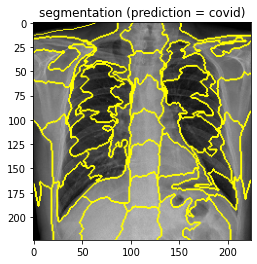

In [148]:
from skimage.segmentation import mark_boundaries
title = 'segmentation (prediction = '+str('covid')+')'

plt.title(title)
plt.imshow(mark_boundaries(img, segment_fn(img)))

In [149]:
explainer = lime_image.LimeImageExplainer()

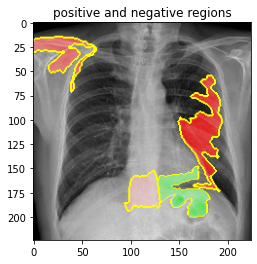

In [150]:
explanation = explainer.explain_instance(img_orig/225, model.predict, num_samples=100, segmentation_fn = segment_fn)
temp, mask = explanation.get_image_and_mask(0, positive_only=False,  num_features=5, hide_rest=False, min_weight=0.0)
plt.title('positive and negative regions')
plt.imshow(mark_boundaries(temp, mask))

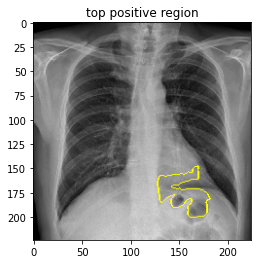

In [151]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True if np.round(top_preds)[0][0] == 1 else False, negative_only = True if np.round(top_preds)[0][0] == 0 else False,  num_features=1, hide_rest=False, min_weight=0.0)
plt.title('top '+ ('positive' if np.round(top_preds)[0][0] == 1 else 'negative') + ' region')
plt.imshow(mark_boundaries(temp, mask))

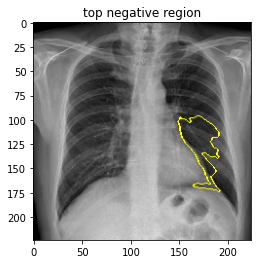

In [152]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True if np.round(top_preds)[0][1] == 1 else False, negative_only = True if np.round(top_preds)[0][1] == 0 else False,  num_features=1, hide_rest=False, min_weight=0.0)
plt.title('top '+ ('positive' if np.round(top_preds)[0][1] == 1 else 'negative') + ' region')
plt.imshow(mark_boundaries(temp, mask))

In [153]:
np.round(top_preds)[0][0]

1